In [9]:
# Set de date - Mall Customer

In [10]:
# Importare librarii
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Citire fișier
df = pd.read_csv('/content/Mall_Customers.csv')

In [12]:
# Prelucrare date
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

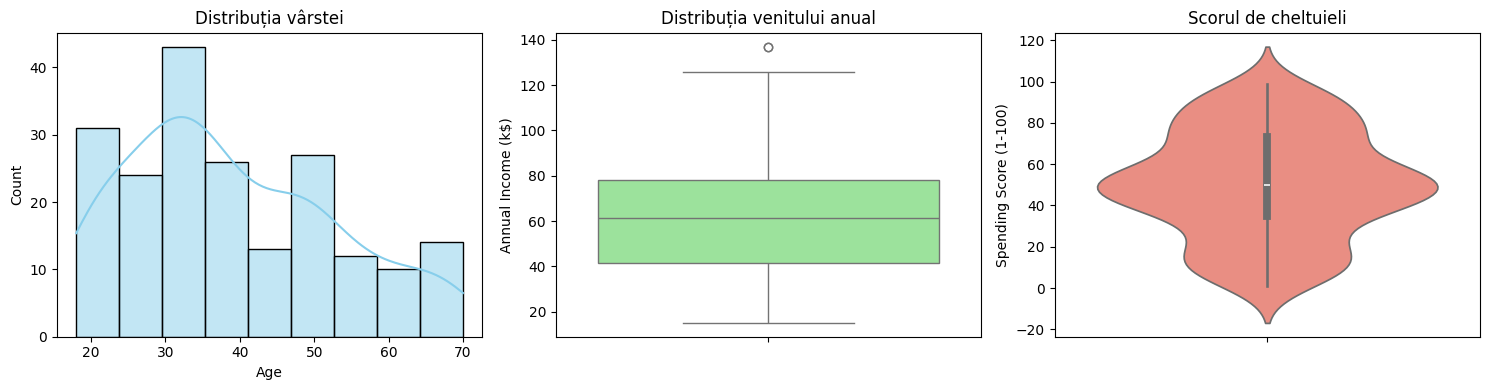

In [13]:
# Grafice statistice
plt.figure(figsize=(15, 4))

# Grafic 1: Distribuția vârstei
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribuția vârstei')

# Grafic 2: Venitul anual
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Annual Income (k$)'], color='lightgreen')
plt.title('Distribuția venitului anual')

# Grafic 3: Scorul de cheltuieli
plt.subplot(1, 3, 3)
sns.violinplot(y=df['Spending Score (1-100)'], color='salmon')
plt.title('Scorul de cheltuieli')

plt.tight_layout()
plt.show()

In [14]:
# Standardizare
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [16]:
# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agg.fit_predict(X_scaled)

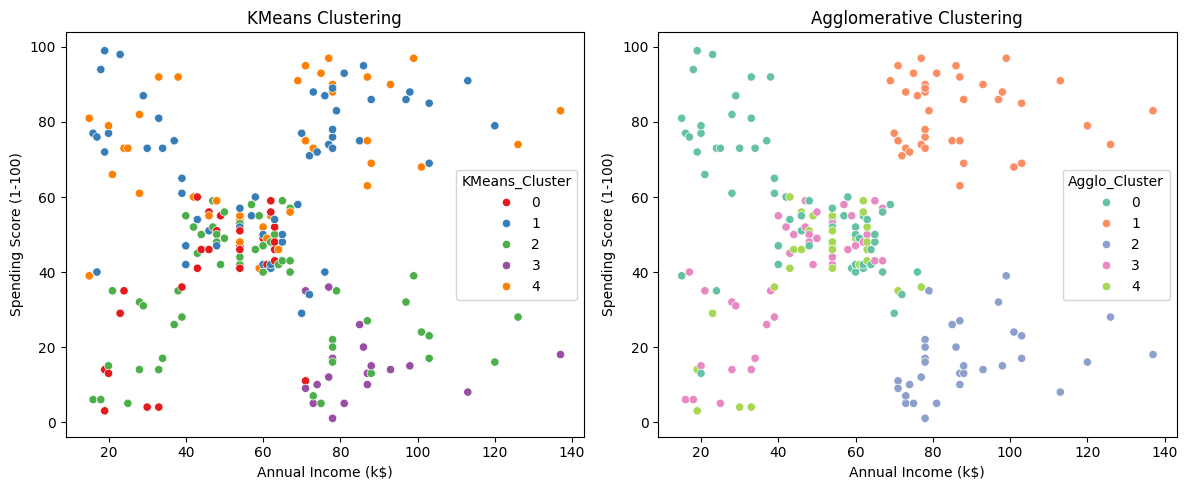

In [17]:
# Vizualizare rezultate clusterizare
plt.figure(figsize=(12,5))

# KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['KMeans_Cluster'], palette='Set1')
plt.title('KMeans Clustering')

# Agglomerative
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Agglo_Cluster'], palette='Set2')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()